In [ ]:
!pip install numpy
!pip install pandas
!pip install matplotlib 
!pip install scikit-learn 
!pip install tensorflow yfinance
!pip install tensorflow


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import yfinance as yf

In [15]:
ticker = 'AMZN'
stock_data = yf.download(ticker, start='2010-01-01', end='2021-01-01')
stock_data = stock_data['Close']

[*********************100%%**********************]  1 of 1 completed


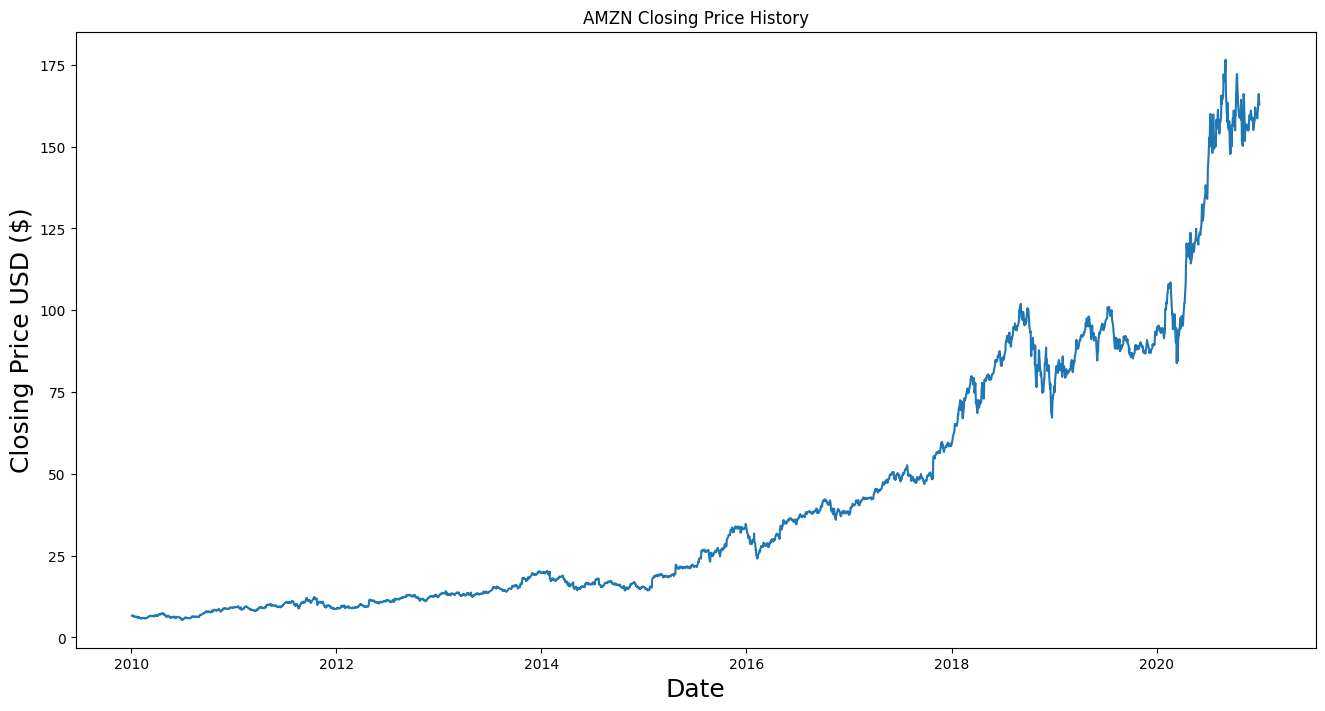

In [16]:
plt.figure(figsize=(16,8))
plt.title(f'{ticker} Closing Price History')
plt.plot(stock_data.index, stock_data)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing Price USD ($)', fontsize=18)
plt.show()


In [17]:
data = stock_data.values
data = data.reshape(-1, 1)


In [18]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [19]:
train_data_len = int(np.ceil(len(scaled_data) * .95))
train_data = scaled_data[0:int(train_data_len), :]

In [20]:
x_train = []
y_train = []

In [21]:
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.0073886 , 0.0076194 , 0.00690655, 0.0062492 , 0.00727758,
       0.00633977, 0.00547498, 0.00598918, 0.00547498, 0.00541363,
       0.00555095, 0.0050163 , 0.00526171, 0.00374543, 0.00341821,
       0.00317573, 0.00413107, 0.00508934, 0.00490821, 0.00299751,
       0.0027784 , 0.00306471, 0.0021415 , 0.00256512, 0.00240151,
       0.0027521 , 0.00255636, 0.00335394, 0.00322831, 0.00260602,
       0.00224959, 0.00276671, 0.0026031 , 0.00274626, 0.0025213 ,
       0.00324584, 0.00280177, 0.0028602 , 0.00465403, 0.00494326,
       0.00504844, 0.00581973, 0.00593075, 0.00628133, 0.00590445,
       0.00639819, 0.00729511, 0.00678092, 0.00657933, 0.00677215,
       0.00664068, 0.00705554, 0.00635145, 0.00638651, 0.006033  ,
       0.00567657, 0.00763109, 0.0077275 , 0.00774503, 0.00817158])]
[0.00793493032374152]

[array([0.0073886 , 0.0076194 , 0.00690655, 0.0062492 , 0.00727758,
       0.00633977, 0.00547498, 0.00598918, 0.00547498, 0.00541363,
       0.00555095, 0.0050163 , 0.00

In [22]:
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [23]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [25]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

2571/2571 ━━━━━━━━━━━━━━━━━━━━ 68s 24ms/step - loss: 0.0012


In [26]:
test_data = scaled_data[train_data_len - 60:, :]

In [27]:
x_test = []
y_test = data[train_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [28]:
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [29]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

train = stock_data[:train_data_len]
valid = stock_data[train_data_len:]
valid['predictions'] = predictions

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 162ms/step


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Mean Squared Error: 0.0
R-squared: nan
Coefficients: [ 0.5 -0.5]
Intercept: 3.500000000000001


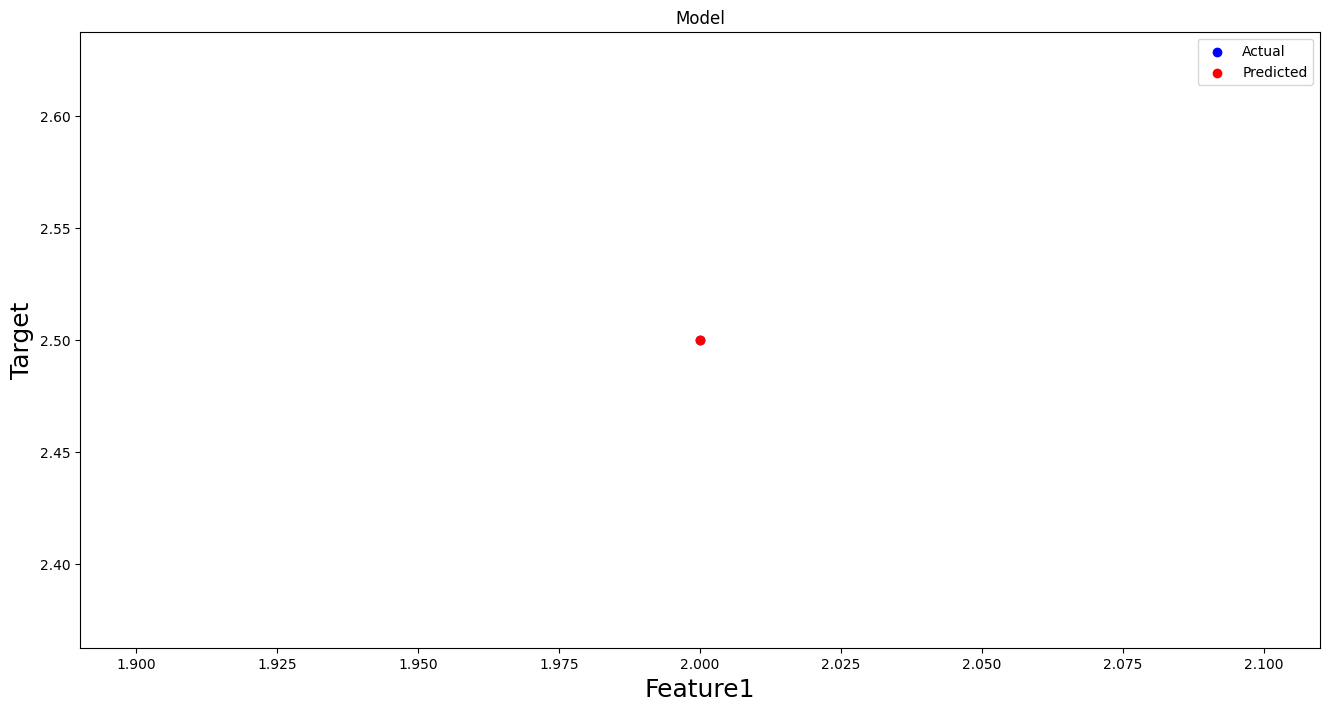

In [5]:
# Import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Example dataset (replace with your actual data)
data = pd.DataFrame({
    'Feature1': [1, 2, 3, 4, 5],
    'Feature2': [5, 4, 3, 2, 1],
    'Target': [1.5, 2.5, 3.5, 4.5, 5.5]
})

# Split data into features (X) and target variable (y)
X = data[['Feature1', 'Feature2']]  # Example features
y = data['Target']  # Example target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Print coefficients
coef = model.coef_
intercept = model.intercept_
print('Coefficients:', coef)
print('Intercept:', intercept)

# Plotting
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Feature1', fontsize=18)
plt.ylabel('Target', fontsize=18)

# Plot actual vs predicted values
plt.scatter(X_test['Feature1'], y_test, color='blue', label='Actual')
plt.scatter(X_test['Feature1'], y_pred, color='red', label='Predicted')

plt.legend()
plt.show()
